This is a kaggle tutorial. You can get the data from https://www.kaggle.com/c/kobe-bryant-shot-selection .
What excited me was that this dataset is excellent to practise classification basics, feature engineering, and time series analysis.

## Importing Data
Let us start with importing the basic libraries we need and the data set.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

# sk learn import 
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None) # display all columns


# importing the dataset
df = pd.read_csv('data.csv')
df.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


data.set_index('shot_id', inplace=True)
data["action_type"] = data["action_type"].astype('object')
data["combined_shot_type"] = data["combined_shot_type"].astype('category')
data["game_event_id"] = data["game_event_id"].astype('category')
data["game_id"] = data["game_id"].astype('category')
data["period"] = data["period"].astype('object')
data["playoffs"] = data["playoffs"].astype('category')
data["season"] = data["season"].astype('category')
data["shot_made_flag"] = data["shot_made_flag"].astype('category')
data["shot_type"] = data["shot_type"].astype('category')
data["team_id"] = data["team_id"].astype('category')

## Getting to know the data
Let us do some basic operations

In [2]:
df.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [3]:
# shape
df.shape

(30697, 25)

In [4]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

## Exploring the columns with Permutation and Random Sampling
To select a random subset without replacement, one way is to slice off the k elements
of an array returned by permutation, where k is the desired subet size.

In [5]:
sampler = np.random.permutation(5)

In [6]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.take.html
df.take(sampler)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1


In [7]:
randomSample = df.take(np.random.permutation(len(df))[:3])

In [8]:
randomSample


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1904,Jump Shot,Jump Shot,198,20100360,33.9113,-164,133,-118.4338,5,2,0,2001-02,39,21,NaN,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2001-12-20,LAL @ HOU,HOU,1905
22043,Jump Shot,Jump Shot,258,21500269,33.9693,148,75,-118.1218,2,2,0,2015-16,34,16,0.0,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2015-12-02,LAL @ WAS,WAS,22044
8747,Layup Shot,Layup,472,20500689,34.0443,0,0,-118.2698,3,4,0,2005-06,21,0,0.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2006-02-04,LAL @ NOK,NOP,8748


In [9]:
randomSample.T

,1904,22043,8747
action_type,Jump Shot,Jump Shot,Layup Shot
combined_shot_type,Jump Shot,Jump Shot,Layup
game_event_id,198,258,472
game_id,20100360,21500269,20500689
lat,33.9113,33.9693,34.0443
loc_x,-164,148,0
loc_y,133,75,0
lon,-118.434,-118.122,-118.27
minutes_remaining,5,2,3
period,2,2,4


## 2. Summarize data

### Descriptive statistics

In [10]:
#Let's take a brief look at all numerical columns statistcs:
df.describe(include =['number'])

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [11]:
#And for categorical columns:
df.describe(include=['object', 'category'])

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent
count,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697
unique,57,6,20,2,6,7,5,1,1559,74,33
top,Jump Shot,Jump Shot,2005-06,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,18880,23485,2318,24271,13455,12625,9398,30697,50,1020,1978


## Data Visualization

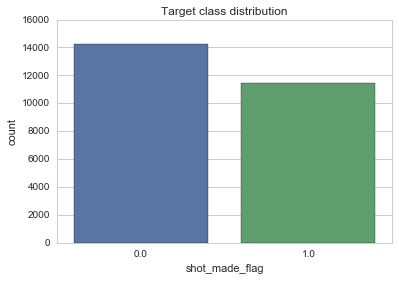

In [12]:
#See target class distribution
ax = plt.axes()
sns.countplot(x='shot_made_flag', data=df, ax=ax);
ax.set_title('Target class distribution')
plt.show()

At first we can see that the target variable is distributed quite equally.
We won't perform any actions to deal with imbalanced dataset.
Data will be presented using boxplot 



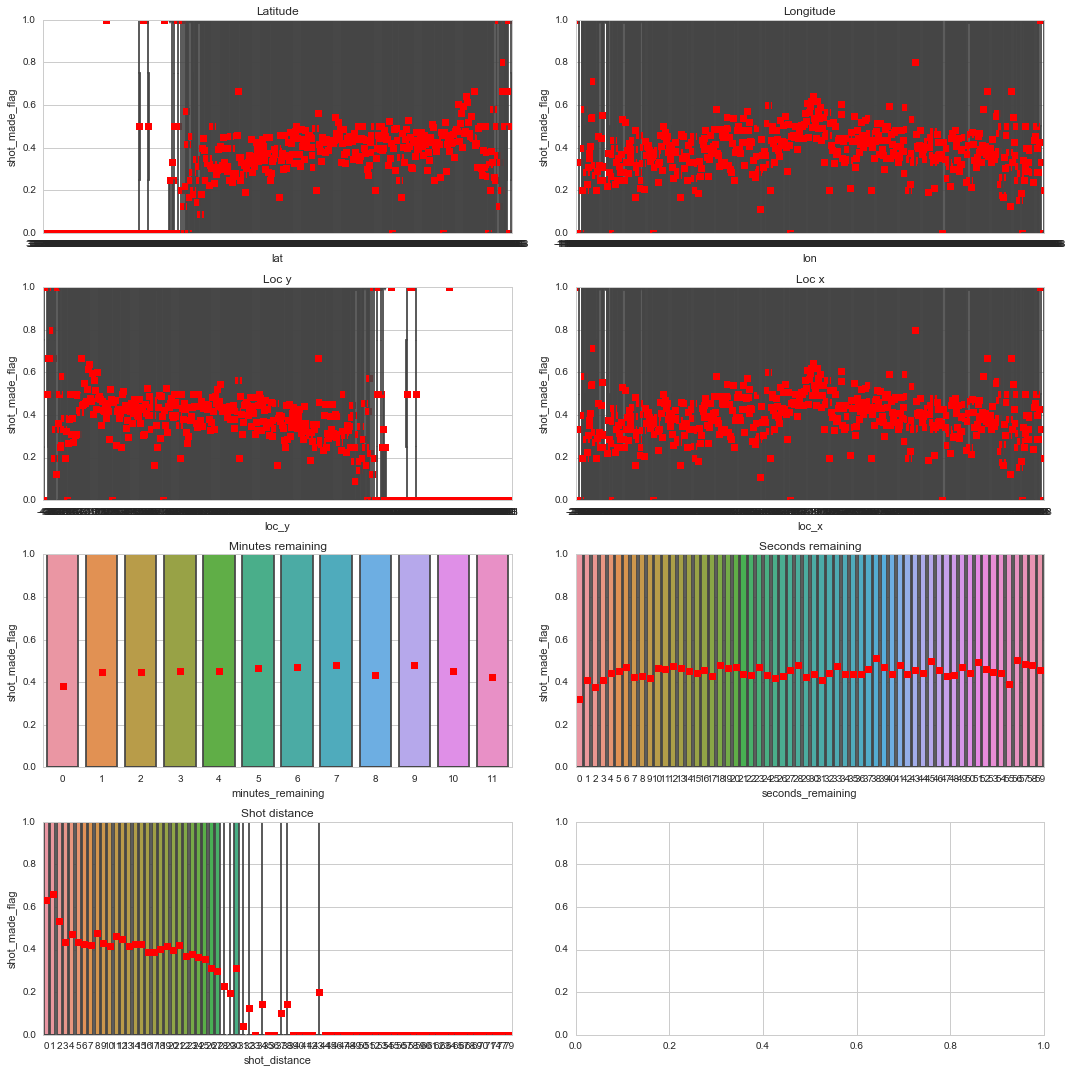

In [14]:
f, axarr = plt.subplots(4, 2, figsize=(15, 15))
sns.boxplot(x='lat', y='shot_made_flag', data=df, showmeans=True, ax=axarr[0,0])
sns.boxplot(x='lon', y='shot_made_flag', data=df, showmeans=True, ax=axarr[0, 1])
sns.boxplot(x='loc_y', y='shot_made_flag', data=df, showmeans=True, ax=axarr[1, 0])
sns.boxplot(x='loc_x', y='shot_made_flag', data=df, showmeans=True, ax=axarr[1, 1])
sns.boxplot(x='minutes_remaining', y='shot_made_flag', showmeans=True, data=df, ax=axarr[2, 0])
sns.boxplot(x='seconds_remaining', y='shot_made_flag', showmeans=True, data=df, ax=axarr[2, 1])
sns.boxplot(x='shot_distance', y='shot_made_flag', data=df, showmeans=True, ax=axarr[3, 0])

axarr[0, 0].set_title('Latitude')
axarr[0, 1].set_title('Longitude')
axarr[1, 0].set_title('Loc y')
axarr[1, 1].set_title('Loc x')
axarr[2, 0].set_title('Minutes remaining')
axarr[2, 1].set_title('Seconds remaining')
axarr[3, 0].set_title('Shot distance')

plt.tight_layout()
plt.show()

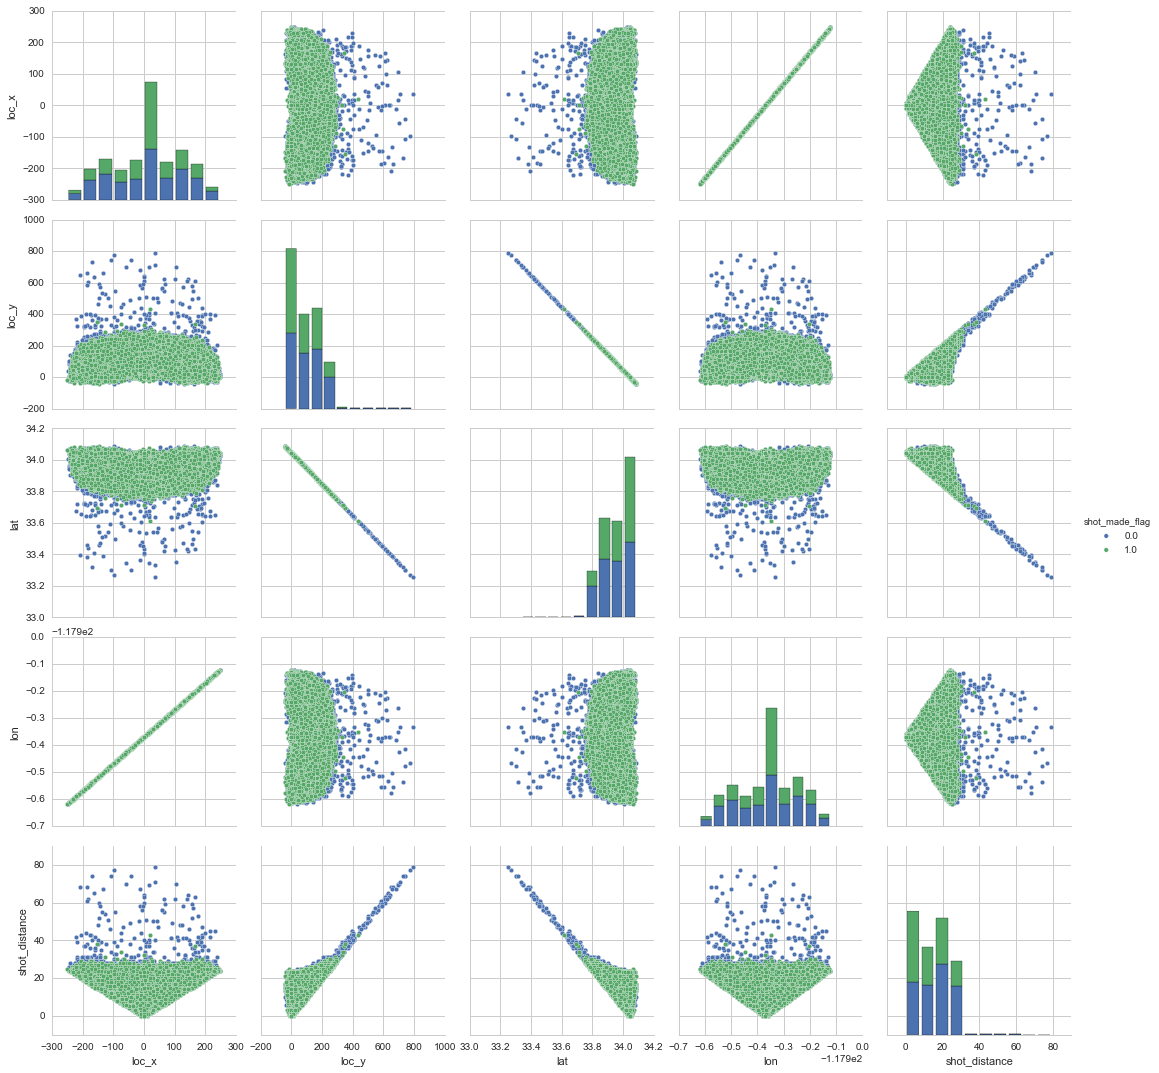

In [28]:
sns.pairplot(df, vars=['loc_x', 'loc_y', 'lat', 'lon', 'shot_distance'], hue='shot_made_flag', size=3)
plt.show()

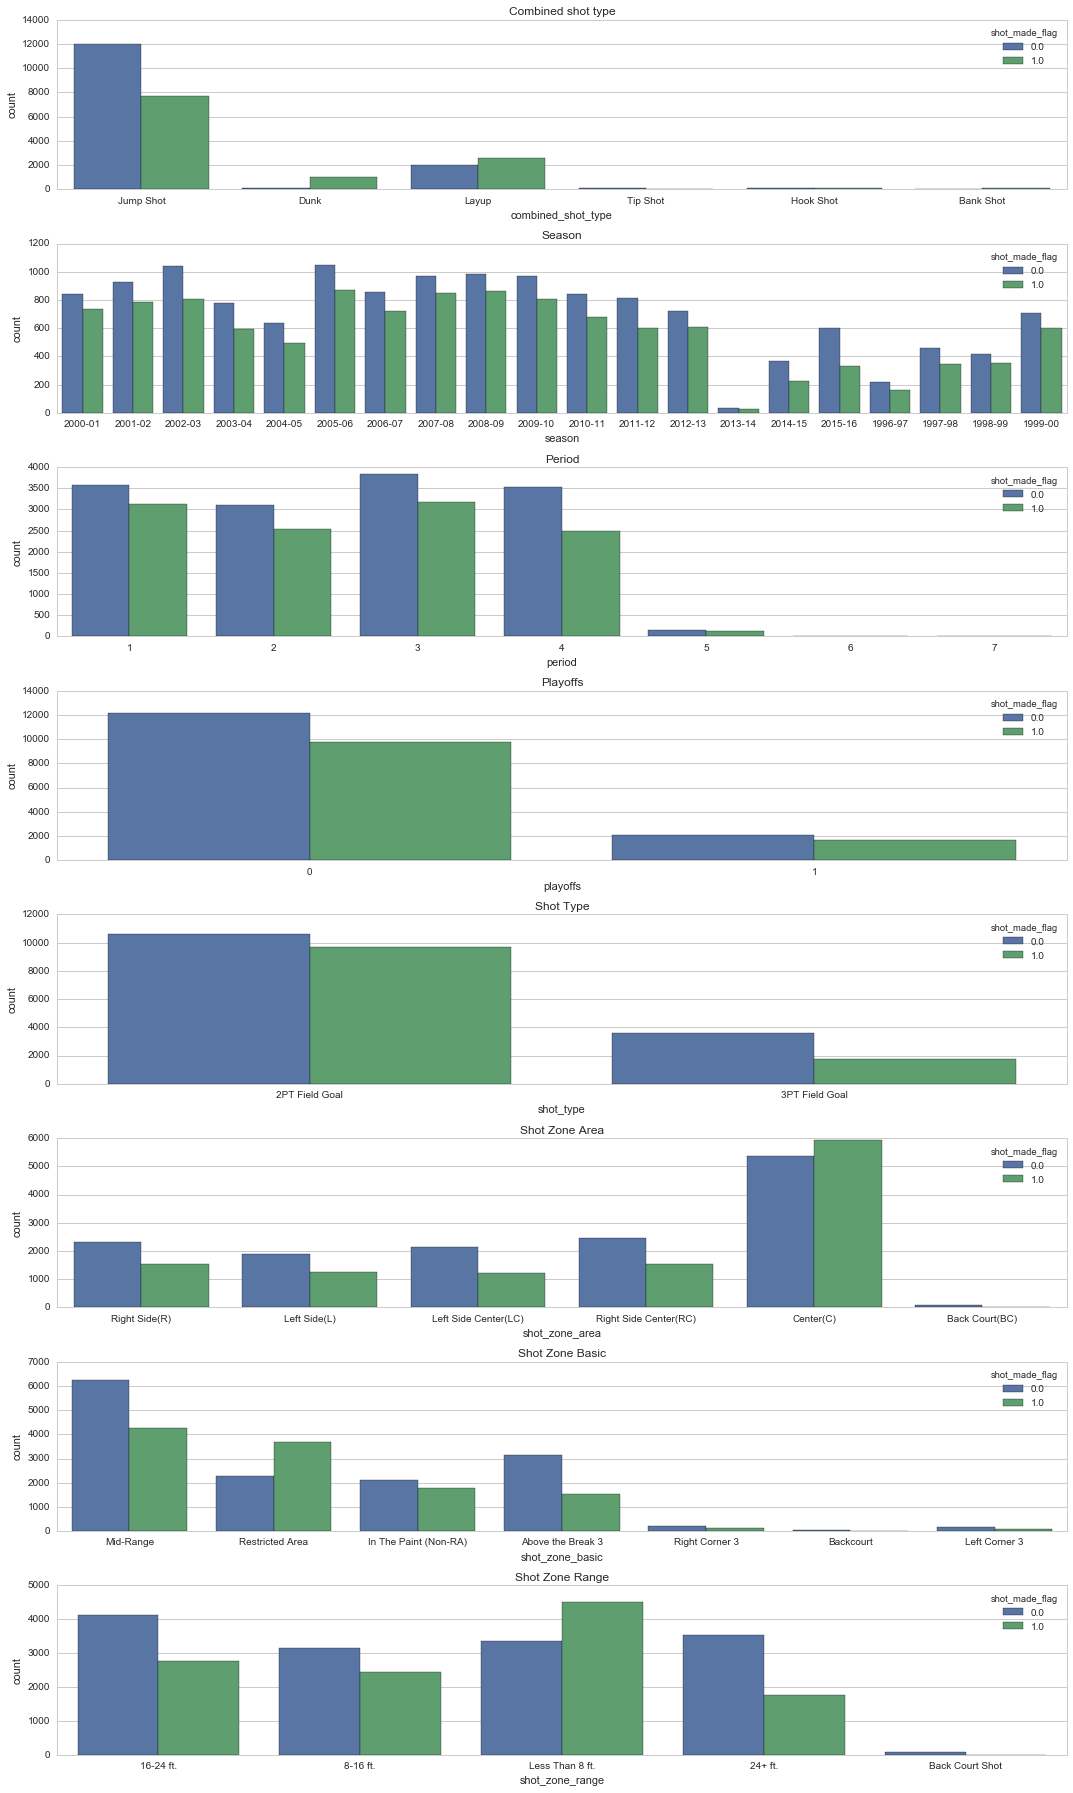

In [30]:
f, axarr = plt.subplots(8, figsize=(15, 25))

sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=df, ax=axarr[0])
sns.countplot(x="season", hue="shot_made_flag", data=df, ax=axarr[1])
sns.countplot(x="period", hue="shot_made_flag", data=df, ax=axarr[2])
sns.countplot(x="playoffs", hue="shot_made_flag", data=df, ax=axarr[3])
sns.countplot(x="shot_type", hue="shot_made_flag", data=df, ax=axarr[4])
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=df, ax=axarr[5])
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=df, ax=axarr[6])
sns.countplot(x="shot_zone_range", hue="shot_made_flag", data=df, ax=axarr[7])

axarr[0].set_title('Combined shot type')
axarr[1].set_title('Season')
axarr[2].set_title('Period')
axarr[3].set_title('Playoffs')
axarr[4].set_title('Shot Type')
axarr[5].set_title('Shot Zone Area')
axarr[6].set_title('Shot Zone Basic')
axarr[7].set_title('Shot Zone Range')

plt.tight_layout()
plt.show()


## Data Cleaning

We are assuming an independence of each shot - therefore some columns might be dropped

In [15]:
data_cl = df.copy() # create a copy of data frame
target = data_cl['shot_made_flag'].copy()

# Remove some columns
data_cl.drop('team_id', axis=1, inplace=True) # Always one number
data_cl.drop('lat', axis=1, inplace=True) # Correlated with loc_x
data_cl.drop('lon', axis=1, inplace=True) # Correlated with loc_y
data_cl.drop('game_id', axis=1, inplace=True) # Independent
data_cl.drop('game_event_id', axis=1, inplace=True) # Independent
data_cl.drop('team_name', axis=1, inplace=True) # Always LA Lakers
data_cl.drop('shot_made_flag', axis=1, inplace=True)


In [16]:
#There are also many outliers, remove them:

def detect_outliers(series, whis=1.5):
    q75, q25 = np.percentile(series, [75 ,25])
    iqr = q75 - q25
    return ~((series - series.median()).abs() <= (whis * iqr))

## For now - do not remove anything


## Data Transformation

##### New features

In [17]:
# Remaining time
data_cl['seconds_from_period_end'] = 60 * data_cl['minutes_remaining'] + data_cl['seconds_remaining']
data_cl['last_5_sec_in_period'] = data_cl['seconds_from_period_end'] < 5

data_cl.drop('minutes_remaining', axis=1, inplace=True)
data_cl.drop('seconds_remaining', axis=1, inplace=True)
data_cl.drop('seconds_from_period_end', axis=1, inplace=True)

## Matchup - (away/home)
data_cl['home_play'] = data_cl['matchup'].str.contains('vs').astype('int')
data_cl.drop('matchup', axis=1, inplace=True)

# Game date
data_cl['game_date'] = pd.to_datetime(data_cl['game_date'])
data_cl['game_year'] = data_cl['game_date'].dt.year
data_cl['game_month'] = data_cl['game_date'].dt.month
data_cl.drop('game_date', axis=1, inplace=True)

# Loc_x, and loc_y binning
data_cl['loc_x'] = pd.cut(data_cl['loc_x'], 25)
data_cl['loc_y'] = pd.cut(data_cl['loc_y'], 25)

# Replace 20 least common action types with value 'Other'
rare_action_types = data_cl['action_type'].value_counts().sort_values().index.values[:20]
data_cl.loc[data_cl['action_type'].isin(rare_action_types), 'action_type'] = 'Other'

##### Encode categorical variables

## Computing Indicator/Dummy Variables

Tranforming  categorical variables into a "dummy" or "indicator" matrix. If a column
in a Dataframe has k dintinct values, a matrix containing k columns containing all 1's 
or 0's.
Pandas has a get_dummies function.
In some cases you may want to add a prefix to the columns.

In [18]:
categorial_cols = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_year',
    'game_month', 'opponent', 'loc_x', 'loc_y']

for cc in categorial_cols:
    dummies = pd.get_dummies(data_cl[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    data_cl.drop(cc, axis=1, inplace=True)
    data_cl = data_cl.join(dummies)

## Feature Selection
Let's reduce the number of features
Create views for easier analysis

In [20]:
# Separate dataset for validation
unknown_mask = df['shot_made_flag'].isnull()
data_submit = data_cl[unknown_mask]

# Separate dataset for training
X = data_cl[~unknown_mask]
Y = target[~unknown_mask]

## Variance Threshold

In [21]:
#Find all features with more than 90% variance in values.
threshold = 0.90
vt = VarianceThreshold().fit(X)

# Find feature names
feat_var_threshold = data_cl.columns[vt.variances_ > threshold * (1-threshold)]
feat_var_threshold


Index(['playoffs', 'shot_distance', 'shot_id', 'home_play',
       'action_type#Jump Shot', 'combined_shot_type#Jump Shot',
       'combined_shot_type#Layup', 'period#1', 'period#2', 'period#3',
       'period#4', 'shot_type#2PT Field Goal', 'shot_type#3PT Field Goal',
       'shot_zone_area#Center(C)', 'shot_zone_area#Left Side Center(LC)',
       'shot_zone_area#Left Side(L)', 'shot_zone_area#Right Side Center(RC)',
       'shot_zone_area#Right Side(R)', 'shot_zone_basic#Above the Break 3',
       'shot_zone_basic#In The Paint (Non-RA)', 'shot_zone_basic#Mid-Range',
       'shot_zone_basic#Restricted Area', 'shot_zone_range#16-24 ft.',
       'shot_zone_range#24+ ft.', 'shot_zone_range#8-16 ft.',
       'shot_zone_range#Less Than 8 ft.', 'game_month#1', 'game_month#2',
       'game_month#3', 'game_month#4', 'game_month#11', 'game_month#12',
       'loc_x#(-10.96, 8.96]', 'loc_y#(-10.6, 22.8]', 'loc_y#(22.8, 56.2]',
       'loc_y#(123, 156.4]'],
      dtype='object')

### The following presents a thought process of creating and debugging ML algorithm for predicting whether a shot is successfull or missed (binary classification problem).

## Top 20 most important features

According to RandomForestClassifier

In [22]:
model = RandomForestClassifier()
model.fit(X, Y)

feature_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["importance"])
feat_imp_20 = feature_imp.sort_values("importance", ascending=False).head(20).index
feat_imp_20

Index(['shot_id', 'shot_distance', 'action_type#Jump Shot', 'home_play',
       'action_type#Layup Shot', 'period#3', 'period#1', 'period#2',
       'period#4', 'game_month#3', 'game_month#2', 'game_month#1',
       'loc_y#(-10.6, 22.8]', 'game_month#12', 'game_month#4', 'game_month#11',
       'shot_zone_area#Center(C)', 'opponent#DEN', 'opponent#HOU',
       'action_type#Running Jump Shot'],
      dtype='object')

## Univariate feature selection
Select top 20 features using  chi2chi2  test. Features must be positive before applying test.

In [23]:
X_minmax = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
X_scored = SelectKBest(score_func=chi2, k='all').fit(X_minmax, Y)
feature_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': X_scored.scores_
    })

feat_scored_20 = feature_scoring.sort_values('score', ascending=False).head(20)['feature'].values
feat_scored_20

array(['combined_shot_type#Dunk', 'action_type#Jump Shot',
       'shot_zone_basic#Restricted Area', 'loc_x#(-10.96, 8.96]',
       'action_type#Driving Layup Shot', 'shot_zone_range#Less Than 8 ft.',
       'loc_y#(-10.6, 22.8]', 'action_type#Slam Dunk Shot',
       'shot_type#3PT Field Goal', 'action_type#Driving Dunk Shot',
       'shot_zone_area#Center(C)', 'action_type#Running Jump Shot',
       'shot_zone_range#24+ ft.', 'shot_zone_basic#Above the Break 3',
       'combined_shot_type#Layup', 'combined_shot_type#Jump Shot',
       'last_5_sec_in_period', 'action_type#Jump Bank Shot',
       'action_type#Pullup Jump shot',
       'shot_zone_area#Left Side Center(LC)'], dtype=object)

## Recursive Feature Elimination
Select 20 features from using recursive feature elimination (RFE) with logistic regression model.

In [24]:
rfe = RFE(LogisticRegression(), 20)
rfe.fit(X, Y)

feature_rfe_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': rfe.ranking_
    })

feat_rfe_20 = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
feat_rfe_20

array(['action_type#Driving Dunk Shot',
       'action_type#Driving Finger Roll Layup Shot',
       'action_type#Driving Finger Roll Shot',
       'action_type#Driving Slam Dunk Shot', 'action_type#Dunk Shot',
       'action_type#Fadeaway Bank shot', 'action_type#Finger Roll Shot',
       'action_type#Hook Shot', 'action_type#Jump Shot',
       'action_type#Layup Shot', 'action_type#Running Bank shot',
       'action_type#Running Hook Shot', 'action_type#Slam Dunk Shot',
       'combined_shot_type#Dunk', 'combined_shot_type#Tip Shot',
       'shot_zone_area#Back Court(BC)', 'shot_zone_range#Back Court Shot',
       'loc_y#(290, 323.4]', 'loc_y#(356.8, 390.2]', 'loc_y#(390.2, 423.6]'], dtype=object)

## Final feature selection
Finally features selected by all methods will be merged together

In [25]:
features = np.hstack([
        feat_var_threshold, 
        feat_imp_20,
        feat_scored_20,
        feat_rfe_20
    ])

features = np.unique(features)
print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-action_type#Driving Dunk Shot
	-action_type#Driving Finger Roll Layup Shot
	-action_type#Driving Finger Roll Shot
	-action_type#Driving Layup Shot
	-action_type#Driving Slam Dunk Shot
	-action_type#Dunk Shot
	-action_type#Fadeaway Bank shot
	-action_type#Finger Roll Shot
	-action_type#Hook Shot
	-action_type#Jump Bank Shot
	-action_type#Jump Shot
	-action_type#Layup Shot
	-action_type#Pullup Jump shot
	-action_type#Running Bank shot
	-action_type#Running Hook Shot
	-action_type#Running Jump Shot
	-action_type#Slam Dunk Shot
	-combined_shot_type#Dunk
	-combined_shot_type#Jump Shot
	-combined_shot_type#Layup
	-combined_shot_type#Tip Shot
	-game_month#1
	-game_month#11
	-game_month#12
	-game_month#2
	-game_month#3
	-game_month#4
	-home_play
	-last_5_sec_in_period
	-loc_x#(-10.96, 8.96]
	-loc_y#(-10.6, 22.8]
	-loc_y#(123, 156.4]
	-loc_y#(22.8, 56.2]
	-loc_y#(290, 323.4]
	-loc_y#(356.8, 390.2]
	-loc_y#(390.2, 423.6]
	-opponent#DEN
	-opponent#HOU
	-period#1
	-period#2


## Prepare dataset for further analysis

In [26]:
data_cl = data_cl.ix[:, features]
data_submit = data_submit.ix[:, features]
X = X.ix[:, features]

print('Clean dataset shape: {}'.format(data_cl.shape))
print('Subbmitable dataset shape: {}'.format(data_submit.shape))
print('Train features shape: {}'.format(X.shape))
print('Target label shape: {}'. format(Y.shape))

Clean dataset shape: (30697, 62)
Subbmitable dataset shape: (5000, 62)
Train features shape: (25697, 62)
Target label shape: (25697,)


## PCA Visualization

In [27]:
components = 8
pca = PCA(n_components=components).fit(X)

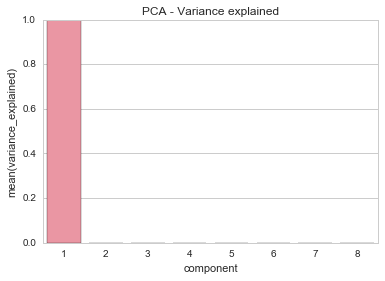

In [28]:
#Show explained variance for each component
pca_variance_explained_df = pd.DataFrame({
    "component": np.arange(1, components+1),
    "variance_explained": pca.explained_variance_ratio_            
    })

ax = sns.barplot(x='component', y='variance_explained', data=pca_variance_explained_df)
ax.set_title("PCA - Variance explained")
plt.show()

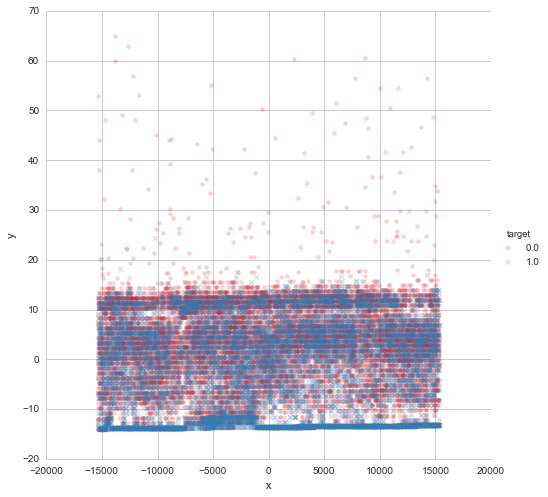

In [29]:
X_pca = pd.DataFrame(pca.transform(X)[:,:2])
X_pca['target'] = Y.values
X_pca.columns = ["x", "y", "target"]

sns.lmplot('x','y', 
           data=X_pca, 
           hue="target", 
           fit_reg=False, 
           markers=["o", "x"], 
           palette="Set1", 
           size=7,
           scatter_kws={"alpha": .2}
          )
plt.show()

#### 4. Evaluate Algorithms

In [30]:
seed = 7
processors=1
num_folds=3
num_instances=len(X)
scoring='log_loss'

kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)

## Algorithms spot-check

In [31]:
# Prepare some basic models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVC', SVC(probability=True)))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
    results.append(cv_results)
    names.append(name)
    print("{0}: ({1:.3f}) +/- ({2:.3f})".format(name, cv_results.mean(), cv_results.std()))

LR: (-0.637) +/- (0.018)
LDA: (-0.613) +/- (0.004)
K-NN: (-0.855) +/- (0.130)
CART: (-15.583) +/- (0.783)
NB: (-1.587) +/- (0.315)


By looking at these results is seems that only Logistic Regression and Linear Discriminant Analysis are providing best results and are worth further examination.
But let's look at ...

## Ensembles

### Bagging (Bootstrap Aggregation)

Involves taking multiple samples from the training dataset (with replacement) and training a model for each sample. The final output prediction is averaged across the predictions of all of the sub-models.


#### Bagged Decision Trees
Bagging performs best with algorithms that have high variance (i.e. decision trees without prunning). Let's check their performance

In [32]:
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(-0.698) +/- (0.020)


### Random Forest
An extension to bagged decision trees. Samples of the training dataset are taken with replacement, but the trees are constructed in a way that reduces the correlation between individual classifiers. Also the tree size is much slowe due to max_features

In [33]:
num_trees = 100
num_features = 10

model = RandomForestClassifier(n_estimators=num_trees, max_features=num_features)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(-0.683) +/- (0.012)


#### Extra Trees
In extremely randomized trees, randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias

## Boosting
Boosting ensembles creates a sequence of models that attemtp to correct the mistakes of the models before them in the sequence. Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

### AdaBoost
The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights  w1,w2,...,wNw1,w2,...,wN  to each of the training samples. Initially, those weights are all set to  wi=1/Nwi=1/N , so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence

In [34]:
model = AdaBoostClassifier(n_estimators=100, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))


(-0.688) +/- (0.004)


## Stochastic Gradient Boosting
Gradient Tree Boosting or Gradient Boosted Regression Trees (GBRT) is a generalization of boosting to arbitrary differentiable loss functions. GBRT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems.

The advantages of GBRT are:
1. Natural handling of data of mixed type (= heterogeneous features)
2. Predictive power
3. Robustness to outliers in output space (via robust loss functions)

The disadvantages of GBRT are:
1. Scalability, due to the sequential nature of boosting it can hardly be parallelized.

In [35]:
model = GradientBoostingClassifier(n_estimators=100, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(-0.616) +/- (0.004)


### Hyperparameter tuning
Logistic Regression

In [36]:
lr_grid = GridSearchCV(
    estimator = LogisticRegression(random_state=seed),
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 1, 10, 100, 1000]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

lr_grid.fit(X, Y)

print(lr_grid.best_score_)
print(lr_grid.best_params_)

-0.611370696703
{'penalty': 'l1', 'C': 1}


In [37]:
#Linear Discriminant Analysis
lda_grid = GridSearchCV(
    estimator = LinearDiscriminantAnalysis(),
    param_grid = {
        'solver': ['lsqr'],
        'shrinkage': [0, 0.25, 0.5, 0.75, 1],
        'n_components': [None, 2, 5, 10]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

lda_grid.fit(X, Y)

print(lda_grid.best_score_)
print(lda_grid.best_params_)

-0.613024770557
{'solver': 'lsqr', 'shrinkage': 0, 'n_components': None}


In [38]:
#KNN
knn_grid = GridSearchCV(
    estimator = Pipeline([
        ('min_max_scaler', MinMaxScaler()),
        ('knn', KNeighborsClassifier())
    ]),
    param_grid = {
        'knn__n_neighbors': [25],
        'knn__algorithm': ['ball_tree'],
        'knn__leaf_size': [2, 3, 4],
        'knn__p': [1]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

knn_grid.fit(X, Y)

print(knn_grid.best_score_)
print(knn_grid.best_params_)

-0.656551021309
{'knn__p': 1, 'knn__algorithm': 'ball_tree', 'knn__leaf_size': 2, 'knn__n_neighbors': 25}


In [39]:
#Random Forest
rf_grid = GridSearchCV(
    estimator = RandomForestClassifier(warm_start=True, random_state=seed),
    param_grid = {
        'n_estimators': [100, 200],
        'criterion': ['gini', 'entropy'],
        'max_features': [18, 20],
        'max_depth': [8, 10],
        'bootstrap': [True]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

rf_grid.fit(X, Y)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

-0.610909202897
{'bootstrap': True, 'max_features': 18, 'n_estimators': 200, 'max_depth': 8, 'criterion': 'entropy'}


In [40]:
#AdaBoost
ada_grid = GridSearchCV(
    estimator = AdaBoostClassifier(random_state=seed),
    param_grid = {
        'algorithm': ['SAMME', 'SAMME.R'],
        'n_estimators': [10, 25, 50],
        'learning_rate': [1e-3, 1e-2, 1e-1]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

ada_grid.fit(X, Y)

print(ada_grid.best_score_)
print(ada_grid.best_params_)

-0.640973140848
{'n_estimators': 10, 'algorithm': 'SAMME.R', 'learning_rate': 0.001}


In [41]:
#Gradient Boosting
gbm_grid = GridSearchCV(
    estimator = GradientBoostingClassifier(warm_start=True, random_state=seed),
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [2, 3, 4],
        'max_features': [10, 15, 20],
        'learning_rate': [1e-1, 1]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

gbm_grid.fit(X, Y)

print(gbm_grid.best_score_)
print(gbm_grid.best_params_)

-0.611615737746
{'max_features': 10, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}


In [42]:
#Voting Ensemble
# Create sub models
estimators = []

estimators.append(('lr', LogisticRegression(penalty='l2', C=1)))
estimators.append(('gbm', GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, max_features=15, warm_start=True, random_state=seed)))
estimators.append(('rf', RandomForestClassifier(bootstrap=True, max_depth=8, n_estimators=200, max_features=20, criterion='entropy', random_state=seed)))
estimators.append(('ada', AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1e-2, n_estimators=10, random_state=seed)))

# create the ensemble model
ensemble = VotingClassifier(estimators, voting='soft', weights=[2,3,3,1])

results = cross_val_score(ensemble, X, Y, cv=kfold, scoring=scoring,n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(-0.616) +/- (0.005)


## Final Prediction

In [43]:
model = ensemble

model.fit(X, Y)
preds = model.predict_proba(data_submit)

submission = pd.DataFrame()
submission["shot_id"] = data_submit.index
submission["shot_made_flag"]= preds[:,0]

submission.to_csv("sub.csv",index=False)

In [19]:
#columns not needed
notNeeded = []

In [183]:
#Action type column
print(df['action_type'].unique())

['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Driving Layup Shot' 'Reverse Layup Shot' 'Reverse Dunk Shot'
 'Slam Dunk Shot' 'Turnaround Jump Shot' 'Tip Shot' 'Running Hook Shot'
 'Alley Oop Dunk Shot' 'Dunk Shot' 'Alley Oop Layup shot'
 'Running Dunk Shot' 'Driving Finger Roll Shot' 'Running Layup Shot'
 'Finger Roll Shot' 'Fadeaway Jump Shot' 'Follow Up Dunk Shot' 'Hook Shot'
 'Turnaround Hook Shot' 'Running Tip Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Reverse Layup Shot'
 'Driving Finger Roll Layup Shot' 'Fadeaway Bank shot' 'Pullup Jump shot'
 'Finger Roll Layup Shot' 'Turnaround Fadeaway shot'
 'Driving Reverse Layup Shot' 'Driving Slam Dunk Shot'
 'Step Back Jump shot' 'Reverse Slam Dunk Shot' 'Turnaround Bank shot'
 'Running Finger Roll Layup Shot' 'Floating Jump shot'
 'Putback Slam Dunk Shot' 'Running Bank shot' 'Driving Bank shot'
 'Putback Layup Shot'

In [184]:
#Combined shot type 
print(df['combined_shot_type'].unique())

['Jump Shot' 'Dunk' 'Layup' 'Tip Shot' 'Hook Shot' 'Bank Shot']


In [185]:
#game event and game IDs not needed
notNeeded.extend(['game_event_id','game_id'])

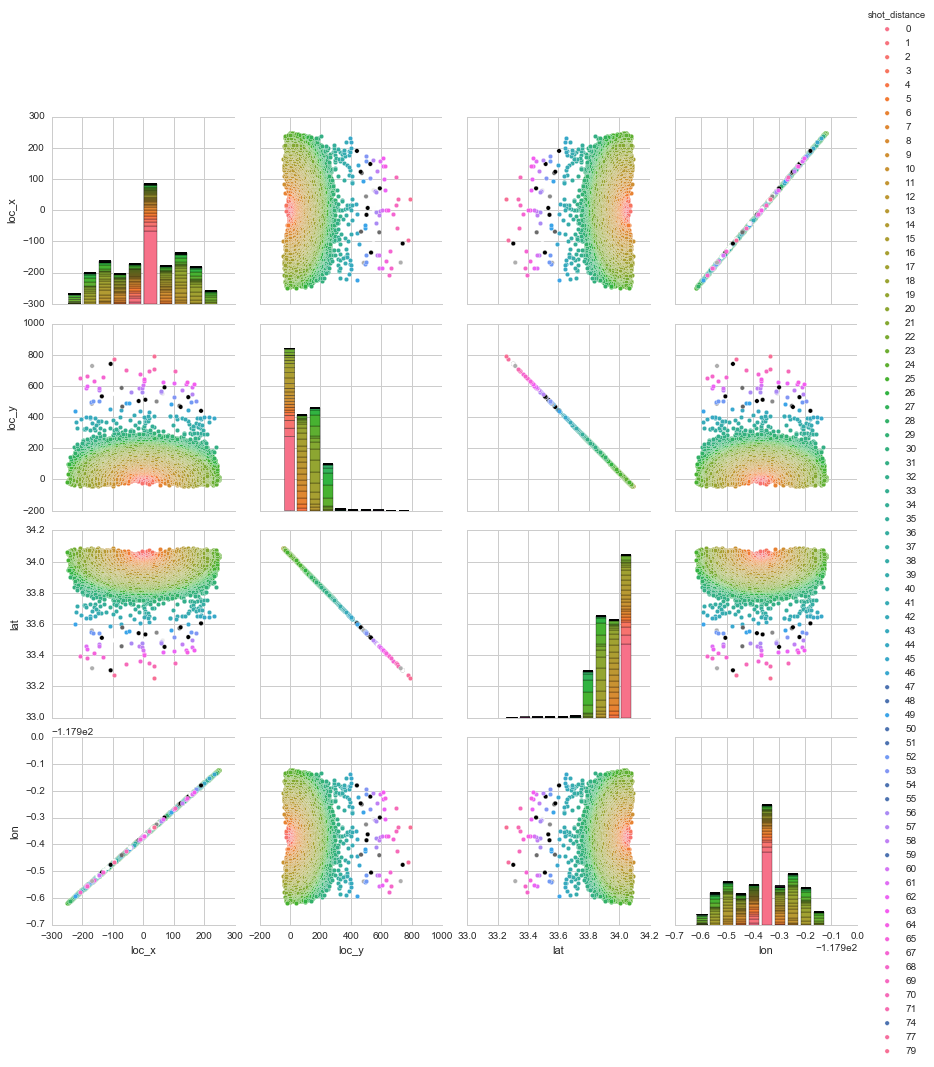

In [29]:
#loc_x,loc_y,lat,lon
#sns.set_style('whitegrid')
sns.pairplot(df, vars=['loc_x', 'loc_y', 'lat', 'lon'], hue='shot_distance',size = 3)

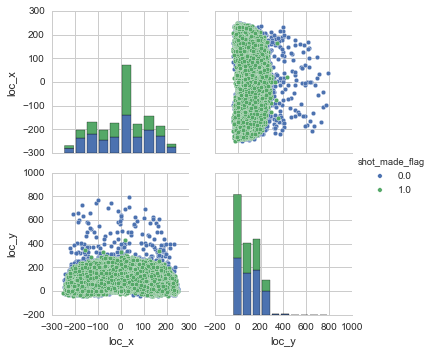

In [187]:
#loc_x,loc_y,lat,lon
sns.set_style('whitegrid')
sns.pairplot(df, vars=['loc_x', 'loc_y'], hue='shot_made_flag')

In [188]:
#loc_x and lon are correlated, also loc_y and lat, so we'll drop lon and lat.
notNeeded.extend(['lon','lat'])

In [189]:
# minutes_remaining and seconds_remaining can be put in one column named time_remaining.
df['timeRemaining'] = 60 * df.loc[:,'minutes_remaining'] + df.loc[:,'seconds_remaining']

In [190]:
notNeeded.extend(['minutes_remaining','seconds_remaining'])

In [191]:
#Period
df['period'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [192]:
#Playoffs
df['playoffs'].unique()

array([0, 1], dtype=int64)

In [193]:
#Shot made flag
df['shot_made_flag'].unique()
#This will be the feature we're looking for, 
#and later we'll split the data based on it.

array([ nan,   0.,   1.])

In [194]:
#Season
#In season column, we'll just keep the year when season started
df['season'] = df['season'].apply(lambda x: x[:4])
#convert column to integer.
df['season'] = pd.to_numeric(df['season'])

In [195]:
#Shot distance
#Seems like shot_distance is just floored distance calculated from x- and
# y- location of a shot, so we'll use more precise measure and drop floored one.
distance = pd.DataFrame({'trueDistance': np.sqrt((df['loc_x']/10)** 2
                        + (df['loc_y']/10) ** 2),
                       'shotDistance': df['shot_distance']})

In [196]:
distance[:5]

,shotDistance,trueDistance
0,18,18.185984
1,15,15.700000
2,16,16.860012
3,22,22.286543
4,0,0.000000


In [197]:
df['shotDistance'] = distance['trueDistance']

In [198]:
notNeeded.append('shot_distance')

In [199]:
notNeeded

['game_event_id',
 'game_id',
 'lon',
 'lat',
 'minutes_remaining',
 'seconds_remaining',
 'shot_distance']

In [200]:
#shot type
df['shot_type'].unique()

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

In [201]:
# We can create a new column 3pt_goal which will have values 1 for 3pt goal
# and 0 for 2pt goal, and then drop shot_type column.
df['3ptGoal'] = df['shot_type'].str.contains('3PT').astype('int')
notNeeded.append('shot_type')

In [202]:
#Shot zone: range,area,basic
print(df['shot_zone_range'].unique())
print(df['shot_zone_area'].unique())
print(df['shot_zone_basic'].unique())

['16-24 ft.' '8-16 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']
['Right Side(R)' 'Left Side(L)' 'Left Side Center(LC)'
 'Right Side Center(RC)' 'Center(C)' 'Back Court(BC)']
['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']


In [203]:
#shot_zone_range is just putting shot_distance in 5 bins. Don't need it.
notNeeded.append('shot_zone_range')

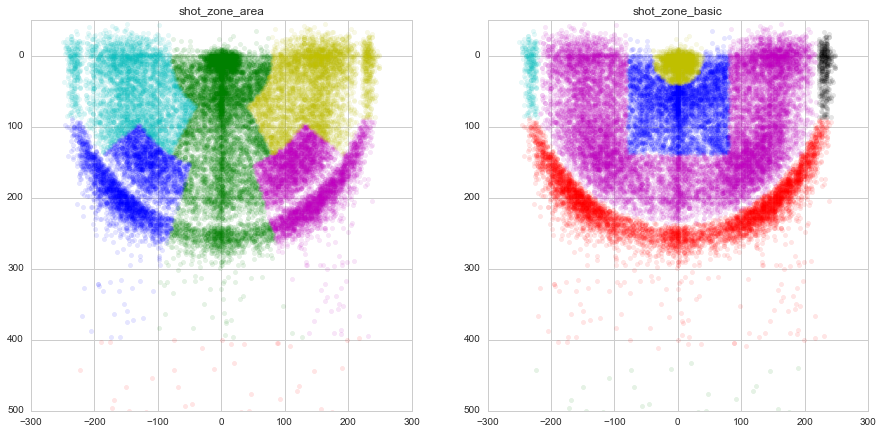

In [204]:
#Let's visualize shot_zone_area and shot_zone_basic.
#We'll put loc_y = 0 near the top, so right and left sides show correctly in the graph.
areaGroup = df.groupby('shot_zone_area')
basicGroup = df.groupby('shot_zone_basic')
plt.subplots(1,2,figsize = (15,7),sharey = True)
colors = list('rgbcmyk')
plt.subplot(121)
plt.ylim(500,-50)
plt.title('shot_zone_area')
for i,(_,area) in enumerate(areaGroup):
    plt.scatter(area['loc_x'],area['loc_y'],alpha = 0.1,color = colors[i])
    
plt.subplot(122)
plt.ylim(500,-50)
plt.title('shot_zone_basic')
for i,(_,basic) in enumerate(basicGroup):
    plt.scatter(basic['loc_x'],basic['loc_y'],alpha = 0.1,color = colors[i])

In [205]:
#Team ID and name
print(df['team_id'].unique())
print(df['team_name'].unique())
#Those two columns are the same for all entries, so we can drop them.
notNeeded.extend(['team_id','team_name'])

[1610612747]
['Los Angeles Lakers']


In [206]:
#Game date
#We'll convert game_date to datetime format, and then split it to year, month and weekday (0 = Monday, 6 = Sunday), so it won't be needed anymore.
df['game_date'] = pd.to_datetime(df['game_date'])
df['game_year'] = df['game_date'].dt.year
df['game_month'] = df['game_date'].dt.month
df['game_day'] = df['game_date'].dt.dayofweek
notNeeded.append('game_date')


In [207]:
#Matchup and opponent
#matchup and opponent columns give as almost the same data - matchup tells us if the game was home or away (depending if it is '@' or 'vs'), so we'll make a new column with that info and then we can drop matchup column.
df['homeGame'] = df['matchup'].str.contains('vs').astype(int)
notNeeded.append('matchup')

In [208]:
#Shot ID
#We can set shot_id as index:
df.set_index('shot_id',inplace = True)

In [209]:
notNeeded

['game_event_id',
 'game_id',
 'lon',
 'lat',
 'minutes_remaining',
 'seconds_remaining',
 'shot_distance',
 'shot_type',
 'shot_zone_range',
 'team_id',
 'team_name',
 'game_date',
 'matchup']

In [210]:
#Exploring the columns - summary
#Let's finally drop all not needed columns:
df = df.drop(notNeeded,axis=1)

In [211]:
df.shape

(30697, 18)

In [212]:
pd.set_option('display.max_columns',None)
random_sample = df.take(np.random.permutation(len(df))[:10])
random_sample.head(10)

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_made_flag,shot_zone_area,shot_zone_basic,opponent,timeRemaining,shotDistance,3ptGoal,game_year,game_month,game_day,homeGame
shot_id,,,,,,,,,,,,,,,,,,
26948,Jump Shot,Jump Shot,-69,281,4,1,2001,1.0,Center(C),Above the Break 3,NJN,10,28.934754,1,2002,6,4,1
23561,Jump Shot,Jump Shot,-91,246,2,0,1997,1.0,Left Side Center(LC),Above the Break 3,DAL,590,26.229182,1,1997,12,6,1
2989,Jump Shot,Jump Shot,24,85,1,0,2001,0.0,Center(C),In The Paint (Non-RA),BOS,287,8.832327,0,2002,4,4,0
18539,Jump Shot,Jump Shot,162,-6,1,0,2011,1.0,Right Side(R),Mid-Range,MIL,312,16.211107,0,2012,1,5,0
19683,Reverse Layup Shot,Layup,-24,1,4,0,2012,1.0,Center(C),Restricted Area,IND,147,2.402082,0,2012,11,1,1
14241,Layup Shot,Layup,0,0,3,0,2008,NaN,Center(C),Restricted Area,UTA,247,0.000000,0,2009,2,2,0
2313,Layup Shot,Layup,0,0,1,0,2001,NaN,Center(C),Restricted Area,SAS,226,0.000000,0,2002,1,4,1
20902,Turnaround Fadeaway shot,Jump Shot,-172,17,2,0,2012,1.0,Left Side(L),Mid-Range,MEM,7,17.283807,0,2013,4,4,1
19212,Pullup Jump shot,Jump Shot,-4,121,3,0,2011,1.0,Center(C),In The Paint (Non-RA),MEM,418,12.106610,0,2012,3,6,1


In [213]:
#Splitting the data
#submission_data are those shots where we don't know if he scored or not, 
#and shots where we'll test accuracy of our model.
submission_data = df[df['shot_made_flag'].isnull()]
submission_data = submission_data.drop('shot_made_flag',1)
submission_data.shape

(5000, 17)

In [214]:
data = df[df['shot_made_flag'].notnull()]
data.shape

(25697, 18)

## Exploring the data

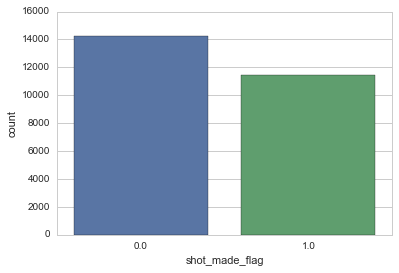

In [215]:
#Shot accuracy
sns.countplot('shot_made_flag',data = data)

In [216]:
data['shot_made_flag'].value_counts() / data['shot_made_flag'].shape
#He scores around 45% of his shots.

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

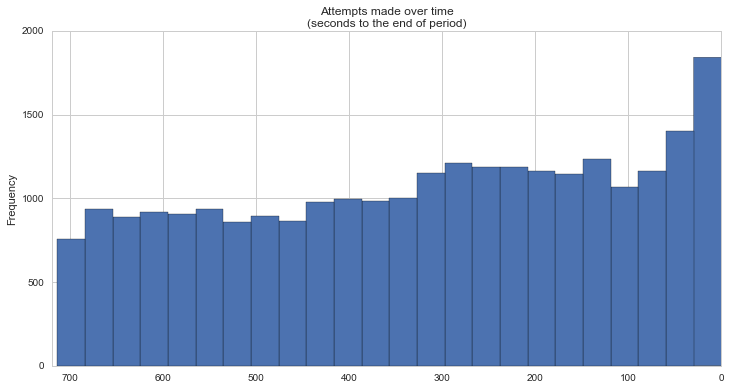

In [218]:
# Let's see his attempts depending on the seconds to the end of a period:
data['timeRemaining'].plot(kind='hist', bins=24, xlim=(720, 0), figsize=(12,6),
                            title='Attempts made over time\n(seconds to the end of period)')

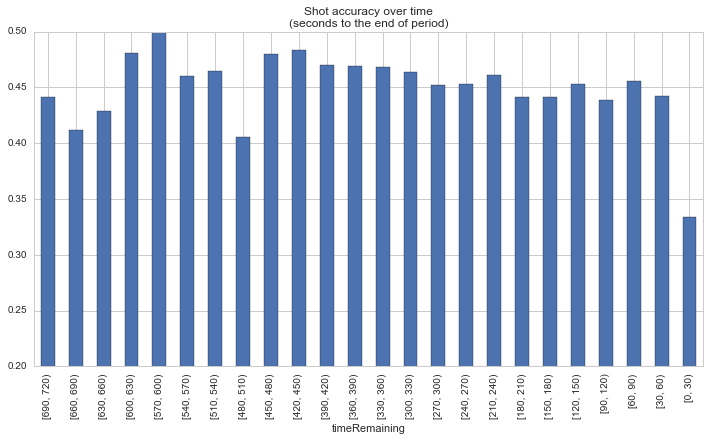

In [219]:
# Accuracy of those shots:
time_bins = np.arange(0, 721, 30)
attempts_in_time = pd.cut(data['timeRemaining'], time_bins, right=False)
grouped = data.groupby(attempts_in_time)
prec = grouped['shot_made_flag'].mean()

prec[::-1].plot(kind='bar', figsize=(12, 6), ylim=(0.2, 0.5), 
                title='Shot accuracy over time\n(seconds to the end of period)')

In [220]:
#Lots of attempts in last 30 seconds, and much worse accuracy than usual. Let's explore that more.
#Shots in the last seconds of a period

last_30 = data[data['timeRemaining'] < 30]
last_30['shot_made_flag'].value_counts() / last_30['shot_made_flag'].shape
#In the last 30 seconds he scores only about 33% of his shots. Pressure?

0.0    0.666305
1.0    0.333695
Name: shot_made_flag, dtype: float64

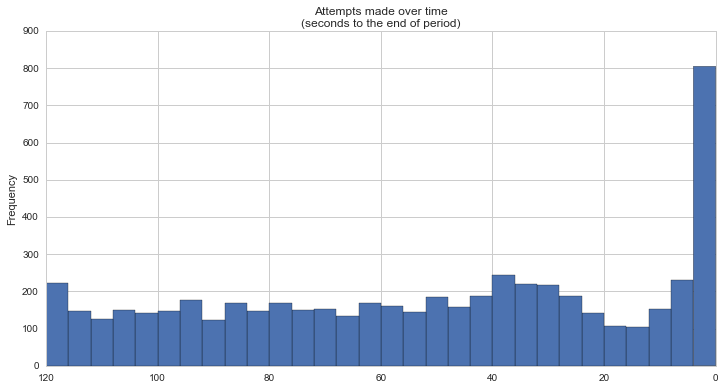

In [221]:
#Let's explore what happens in those last minutes of the game.
last_2min = data[data['timeRemaining'] <= 120]

last_2min['timeRemaining'].plot(kind='hist', bins=30, xlim=(120, 0), figsize=(12,6),
                            title='Attempts made over time\n(seconds to the end of period)')
#Ok, this explains things a bit. Plenty of last seconds desperate shots. 
#Let's return to last 30 seconds.

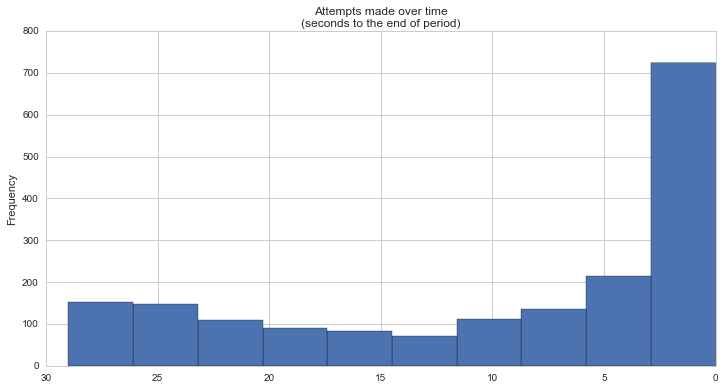

In [222]:
#Let's return to last 30 seconds.
last_30['timeRemaining'].plot(kind='hist', bins=10, xlim=(30, 0), figsize=(12,6),
                            title='Attempts made over time\n(seconds to the end of period)')

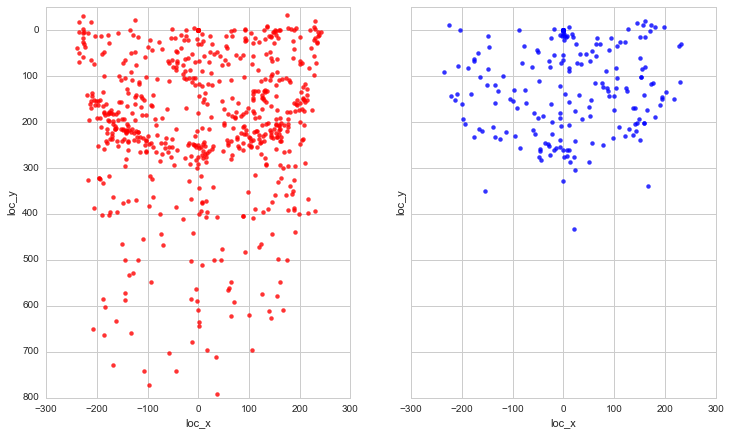

In [224]:
last_5sec_misses = data[(data['timeRemaining'] <= 5) & (data['shot_made_flag'] == 0)]
last_5sec_scores = data[(data['timeRemaining'] <= 5) & (data['shot_made_flag'] == 1)]


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,7))
ax1.set_ylim(800, -50)

sns.regplot(x='loc_x', y='loc_y', data=last_5sec_misses, fit_reg=False, ax=ax1, color='r')
sns.regplot(x='loc_x', y='loc_y', data=last_5sec_scores, fit_reg=False, ax=ax2, color='b')
#In last 5 seconds, there are some desperate shots from far away, plenty of misses from 3pt line,
#but he misses a lot even from close distance.

In [226]:
last_5sec_close = data[(data['timeRemaining'] <= 5) & (data['shotDistance'] <= 20)]

last_5sec_close['shot_made_flag'].value_counts() / last_5sec_close['shot_made_flag'].shape

0.0    0.604317
1.0    0.395683
Name: shot_made_flag, dtype: float64

In [227]:
#For comparison, accuracy from close distance when there are more than 5 seconds to go:
close_shots = data[(data['timeRemaining'] > 5) & (data['shotDistance'] <= 20)]

close_shots['shot_made_flag'].value_counts() / close_shots['shot_made_flag'].shape

0.0    0.512264
1.0    0.487736
Name: shot_made_flag, dtype: float64

## Period accuracy

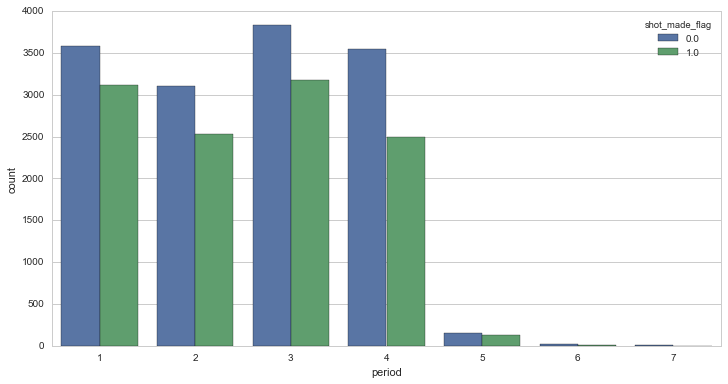

In [228]:
#Number of shots taken in each period
plt.figure(figsize =(12,6))
sns.countplot(x = 'period',hue = "shot_made_flag",data = data)

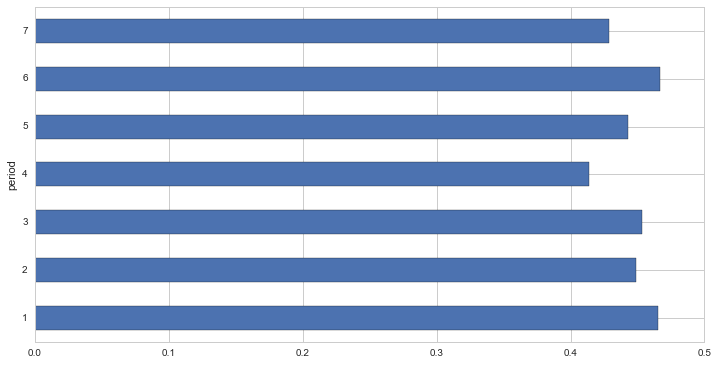

In [229]:
#Accuracy
period_acc = data['shot_made_flag'].groupby(data['period']).mean()
period_acc.plot(kind='barh', figsize=(12, 6))

#Seems like a period of a game doesn't influence much his accuracy.

## Accuracy depending on shot type

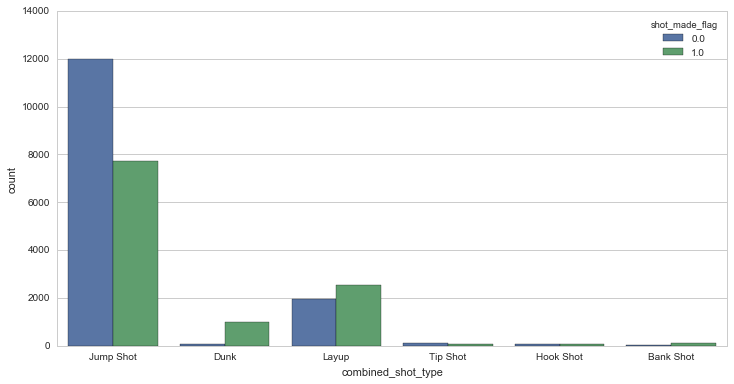

In [231]:
#Combined shot type
#Number of different kinds of shots:
plt.figure(figsize=(12,6))
sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=data)    

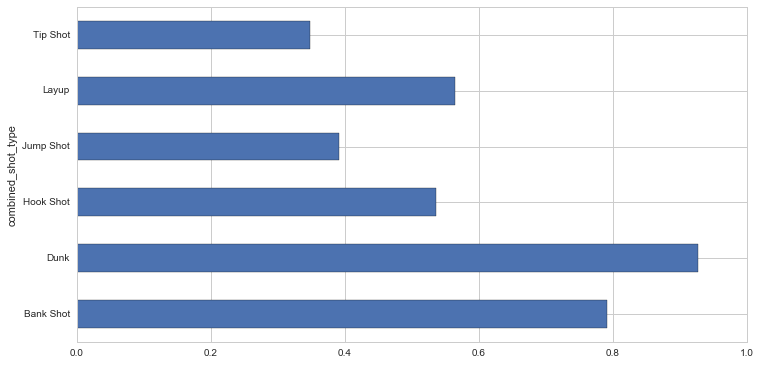

In [232]:
#Accuracy
shot_type_acc = data['shot_made_flag'].groupby(data['combined_shot_type']).mean()
shot_type_acc.plot(kind='barh', figsize=(12, 6))

## Action type
    

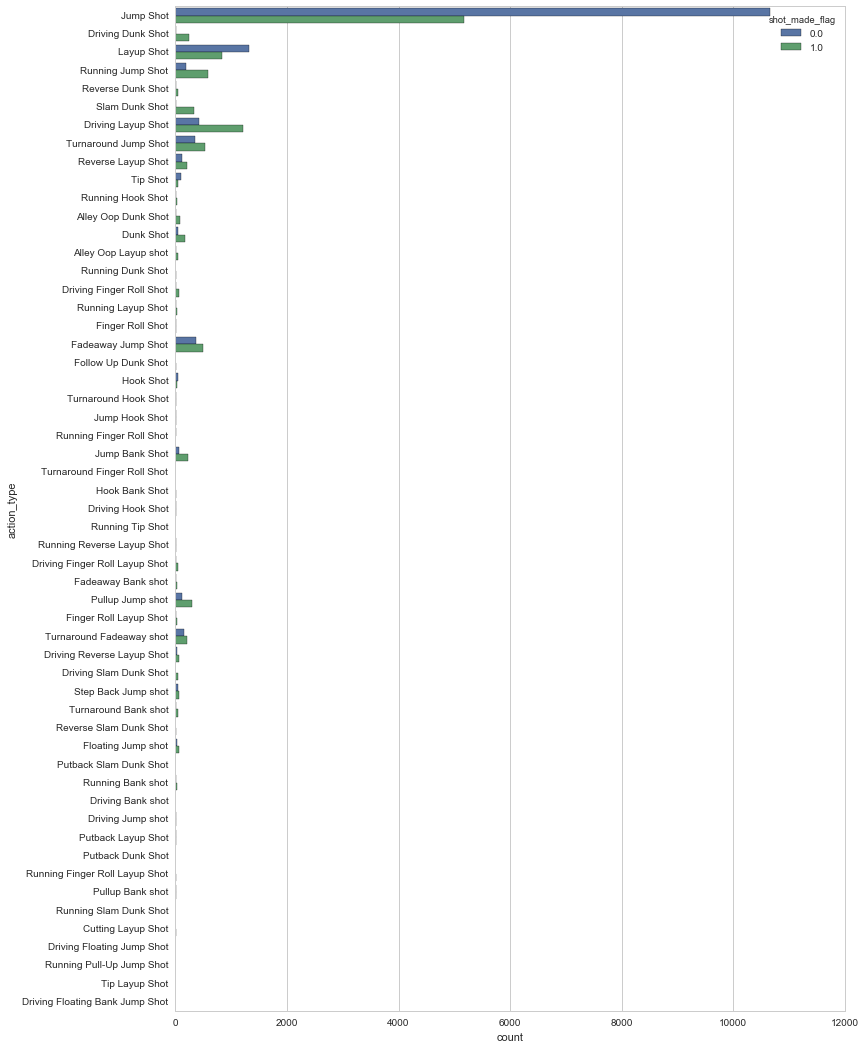

In [233]:
#Number of Shots
plt.figure(figsize=(12,18))
sns.countplot(y="action_type", hue="shot_made_flag", data=data)

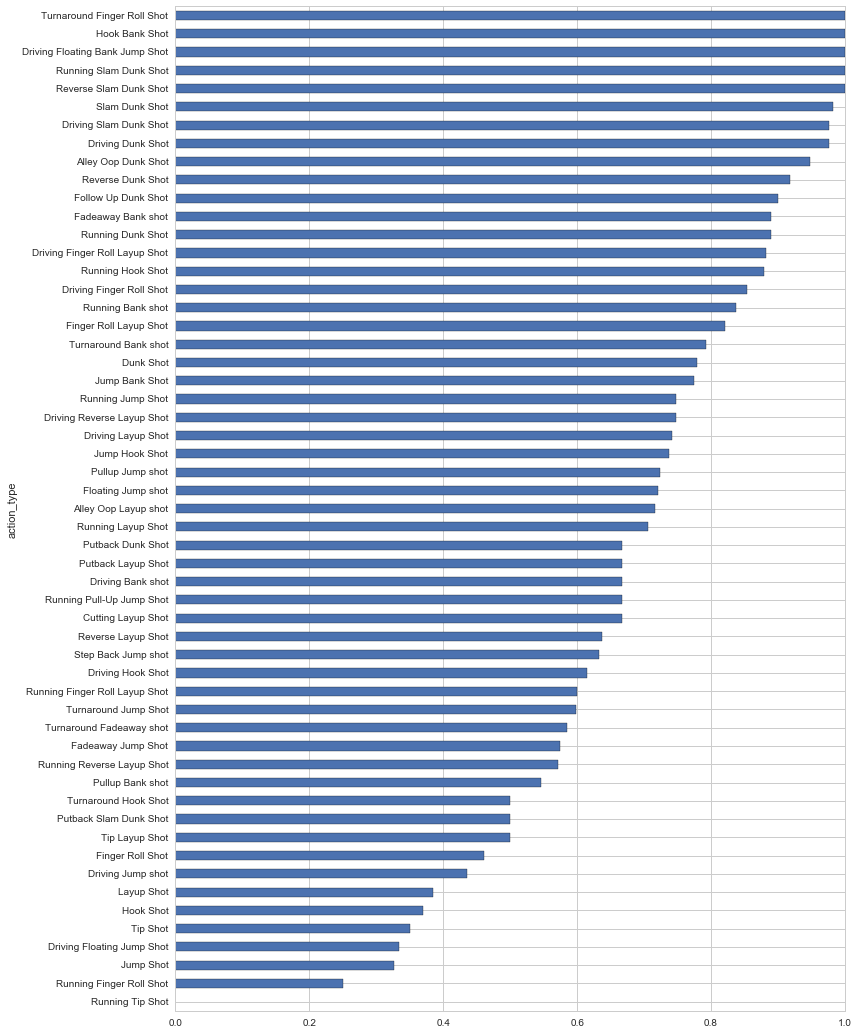

In [237]:
#Accuracy:
action_type = data['shot_made_flag'].groupby(data['action_type']).mean()
action_type.sort_values()

action_type.sort_values().plot(kind='barh', figsize=(12, 18))

## Career accuracy

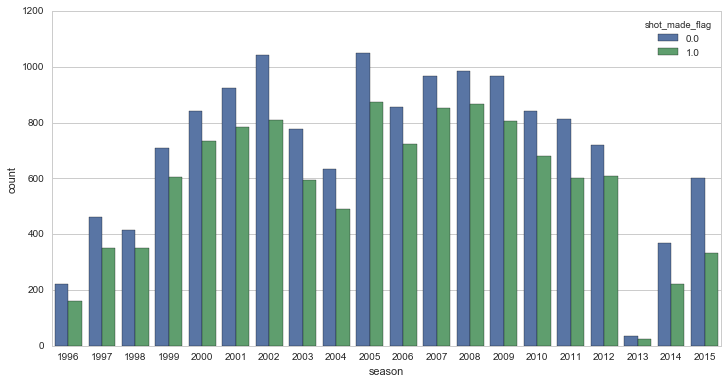

In [235]:
#Number of shots over seasons:
plt.figure(figsize=(12,6))
sns.countplot(x="season", hue="shot_made_flag", data=data)

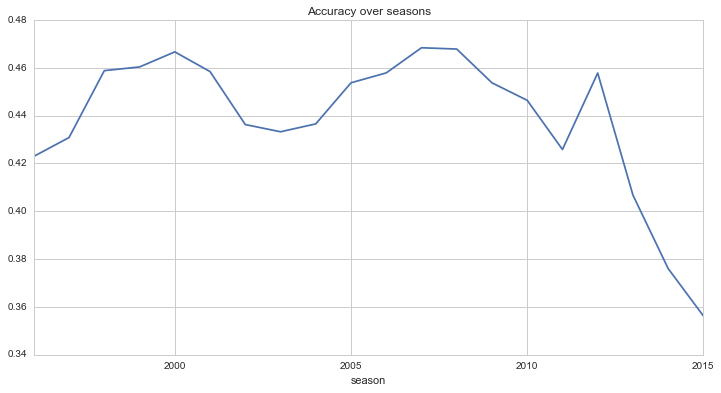

In [238]:
season_acc = data['shot_made_flag'].groupby(data['season']).mean()
season_acc.plot(figsize=(12, 6), title='Accuracy over seasons')

## Some Wikipedia insight on what happened with season 2013-14, and possible explanation for the big decline in his last seasons:
On April 12 [2013], Bryant suffered a torn Achilles tendon against the Golden State Warriors, ending his [2012-13] season. (...) Bryant resumed practicing starting in November, after the start of the 2013–14 season. (...)
Bryant resumed playing on December 8 [2013] after missing the season's first 19 games. On December 17, Bryant matched his season high of 21 points in a 96–92 win over Memphis, but he suffered a lateral tibial plateau fracture in his left knee that was expected to sideline him for six weeks. (...)
On March 12, 2014, the Lakers ruled Bryant out for the remainder of the season, citing his need for more rehab and the limited time remaining in the season.

So I guess he never fully recovered from his injuries, at least when it comes to shot accuracy.

## Season freshness

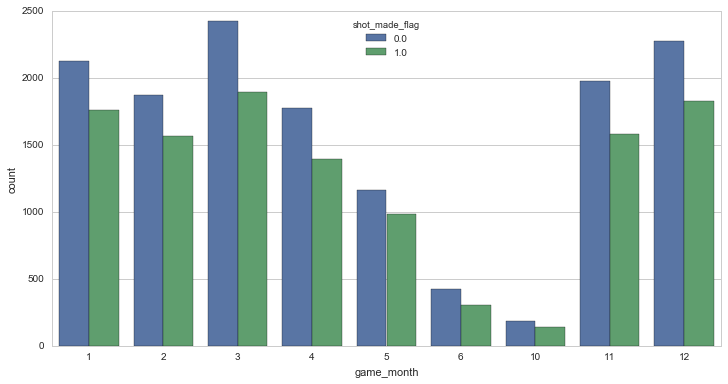

In [239]:
#Number of shots each month:
plt.figure(figsize=(12,6))
sns.countplot(x="game_month", hue="shot_made_flag", data=data)

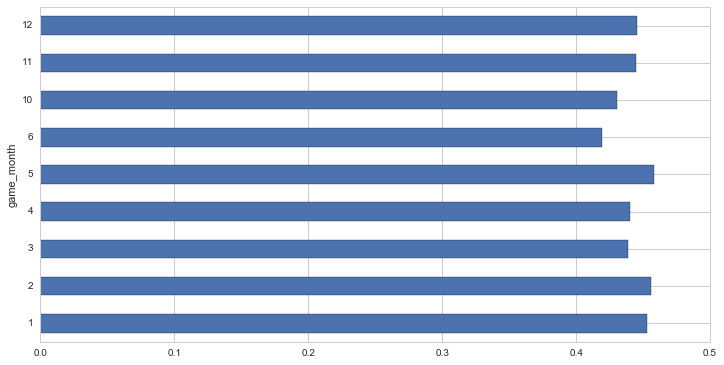

In [241]:
#Accuracy:
game_month = data['shot_made_flag'].groupby(data['game_month']).mean()
game_month.plot(kind='barh', figsize=(12, 6))

Almost the same performance troughout the season - just slightly worse accuracy at the start (month 10) and at the end (month 6) of the season, but those months have much less games than other months.

## Weekday

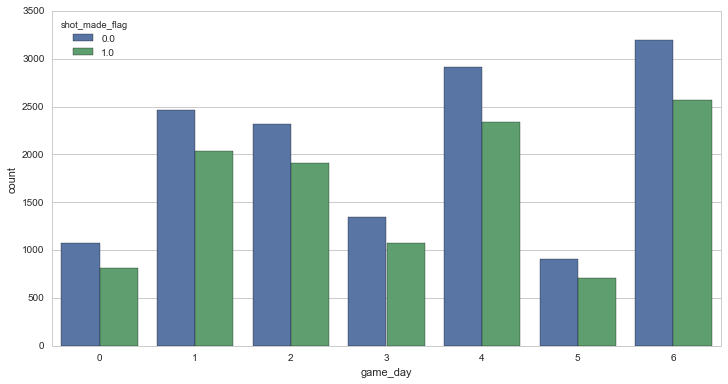

In [242]:
plt.figure(figsize=(12,6))
sns.countplot(x="game_day", hue="shot_made_flag", data=data)

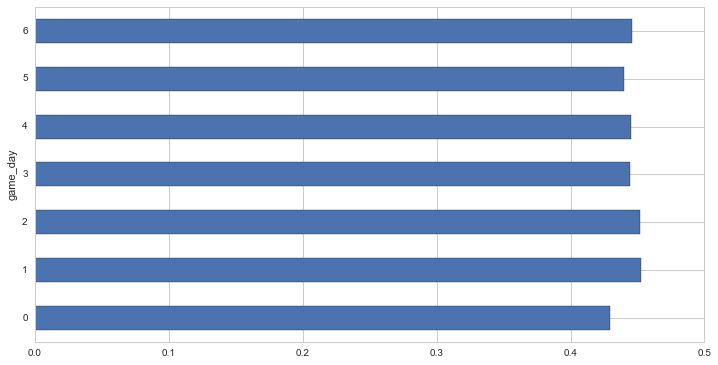

In [243]:
#Accuracy:
game_day = data['shot_made_flag'].groupby(data['game_day']).mean()
game_day.plot(kind='barh', figsize=(12, 6))

Again no noticeable difference

## Regular season vs playoffs

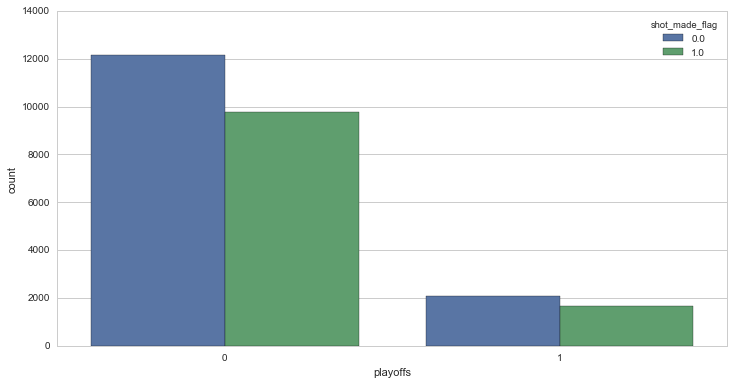

In [244]:
#Number of shots:
plt.figure(figsize=(12,6))
sns.countplot(x="playoffs", hue="shot_made_flag", data=data)

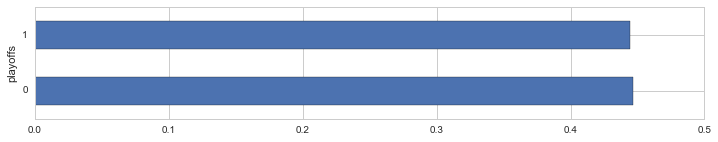

In [245]:
#Accuracy:
playoffs = data['shot_made_flag'].groupby(data['playoffs']).mean()
playoffs.plot(kind='barh', figsize=(12, 2), xlim=(0, 0.50))

No difference between regular season and playoffs.


## Shot distance

In [246]:
#First let's create categories of distances, each 3ft long.
distance_bins = np.append(np.arange(0, 31, 3), 300) 
distance_cat = pd.cut(data['shotDistance'], distance_bins, right=False)

dist_data = data.loc[:, ['shotDistance', 'shot_made_flag']]
dist_data['distance_cat'] = distance_cat

distance_cat.value_counts(sort=False)

[0, 3)       5613
[3, 6)       1080
[6, 9)       1728
[9, 12)      1718
[12, 15)     2324
[15, 18)     3362
[18, 21)     3319
[21, 24)     1735
[24, 27)     3954
[27, 30)      683
[30, 300)     181
dtype: int64

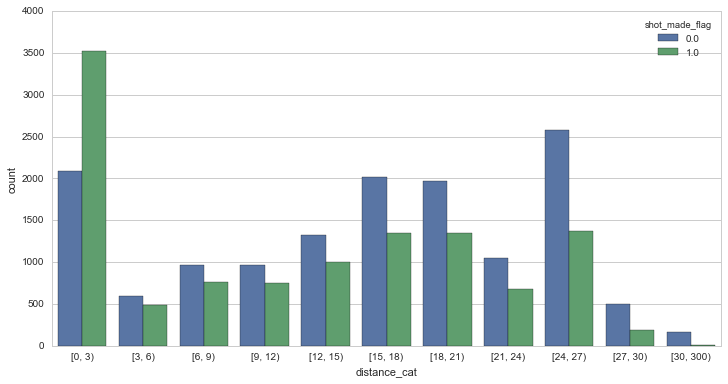

In [247]:
#Number of shots in each distance category:
plt.figure(figsize=(12,6))
sns.countplot(x="distance_cat", hue="shot_made_flag", data=dist_data)

Small number of shots in [21, 24) because that's just inside of 3pt line - better to step outside and try going for 3pt.

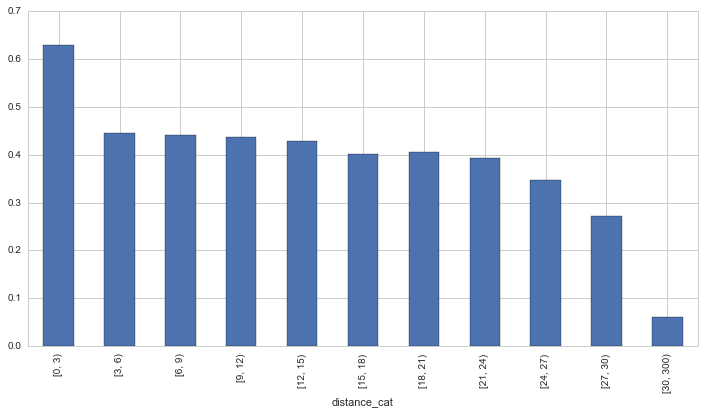

In [248]:
#Accuracy by distance category:
dist_prec = dist_data['shot_made_flag'].groupby(dist_data['distance_cat']).mean()
dist_prec.plot(kind='bar', figsize=(12, 6))

## Shot zones

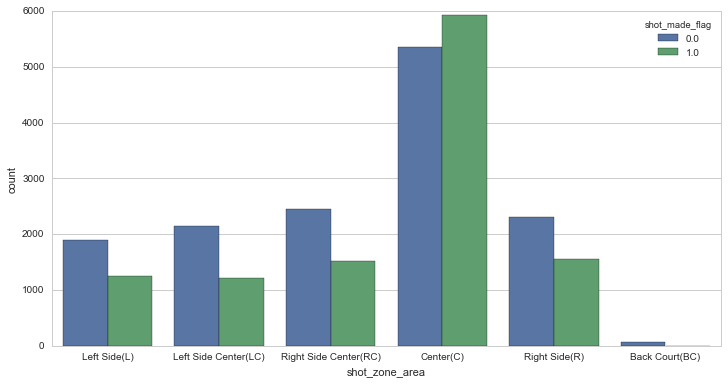

In [249]:
#Shot zone area
#Number of shots:
plt.figure(figsize=(12,6))
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=data)

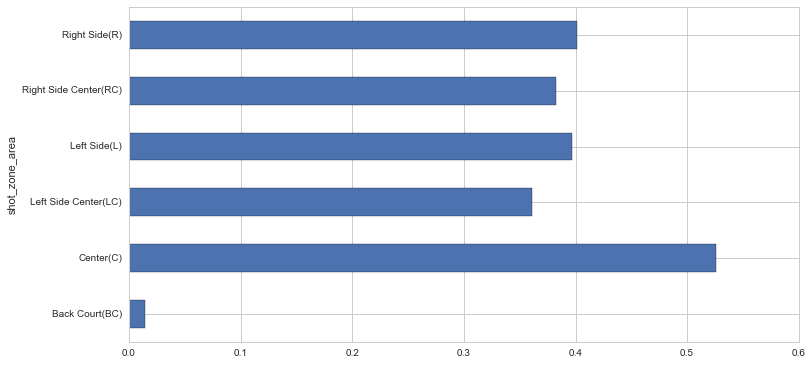

In [251]:
#Accuracy:
shot_area = data['shot_made_flag'].groupby(data['shot_zone_area']).mean()
shot_area.plot(kind='barh', figsize=(12, 6))

He's most accurate from the center, but what's interesting is that he's slightly more accurate from the right side.

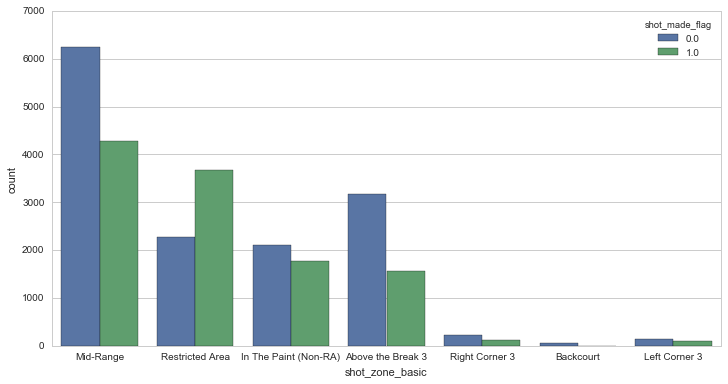

In [253]:
#Shot zone basic
#Number of shots:
plt.figure(figsize=(12,6))
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=data)

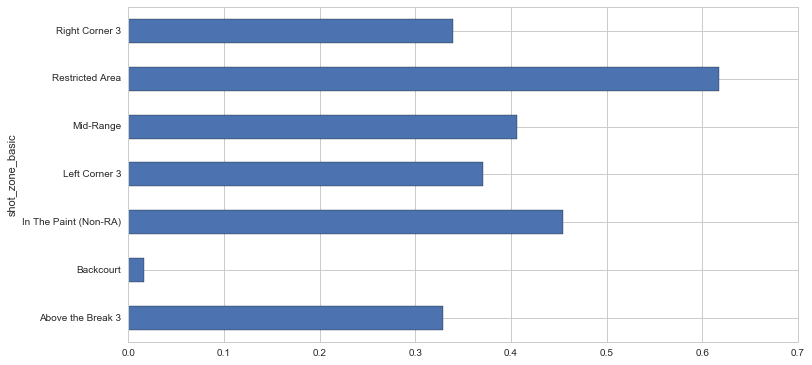

In [254]:
#Accuracy:
shot_basic = data['shot_made_flag'].groupby(data['shot_zone_basic']).mean()
shot_basic.plot(kind='barh', figsize=(12, 6))

We have seen that he's more accurate from right-hand side, but when it comes to corners - left corner suits him slightly better.

## Home game vs away

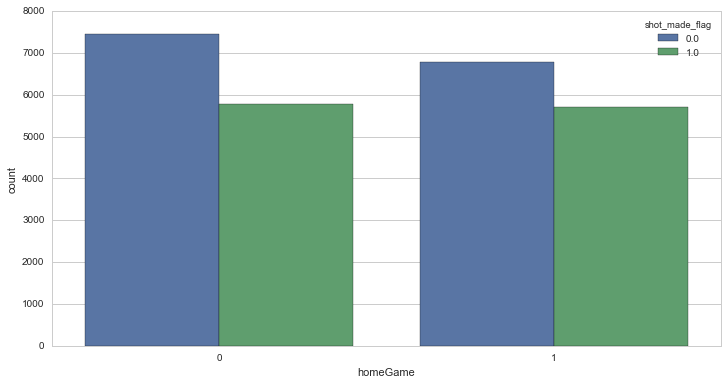

In [256]:
#Number of shots:
plt.figure(figsize=(12,6))
sns.countplot(x="homeGame", hue="shot_made_flag", data=data)

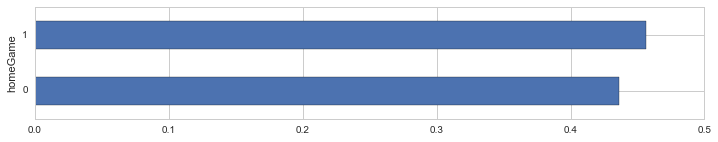

In [258]:
#Accuracy:
shot_basic = data['shot_made_flag'].groupby(data['homeGame']).mean()
shot_basic.plot(kind='barh', figsize=(12, 2))

Slightly more accurate in front of his home crowd.

## Opponents

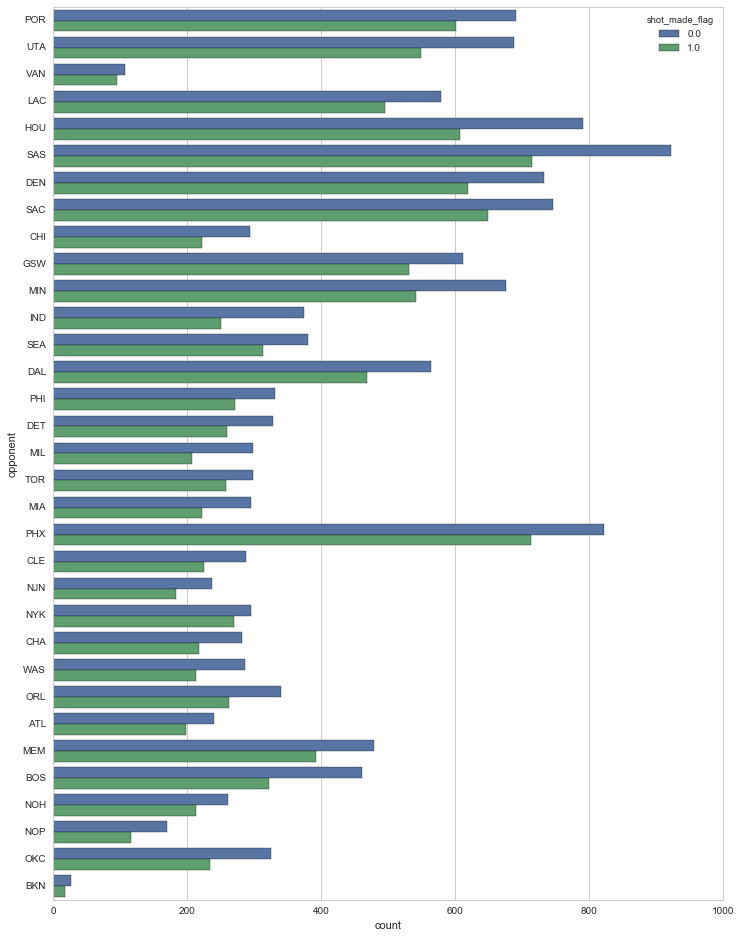

In [260]:
#Number of shots:
plt.figure(figsize=(12,16))
sns.countplot(y="opponent", hue="shot_made_flag", data=data)

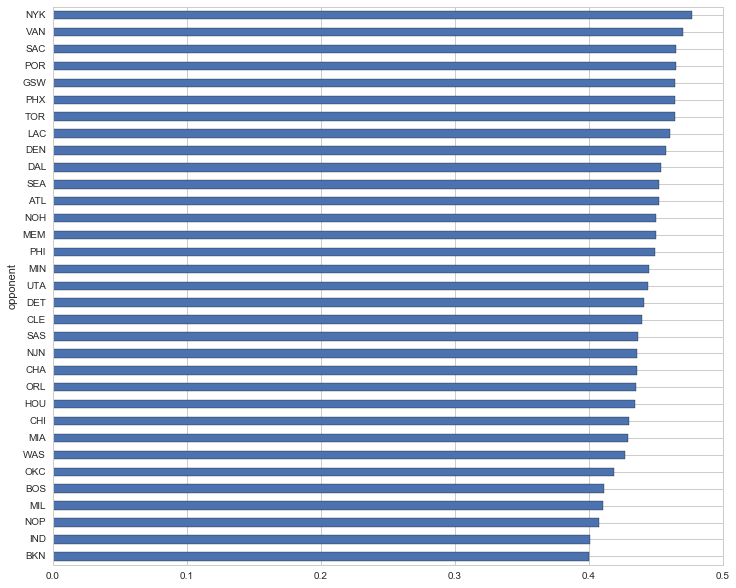

In [261]:
#Accuracy:
opponent = data['shot_made_flag'].groupby(data['opponent']).mean()
opponent.sort_values().plot(kind='barh', figsize=(12,10))